### **Data Cleaning**

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
# reading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/TSLA.csv")

In [ ]:
dataset.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [ ]:
dataset.tail()

Date        Open        High  ...       Close   Adj Close    Volume
2411  2020-01-28  568.489990  576.809998  ...  566.900024  566.900024  11788500
2412  2020-01-29  575.690002  589.799988  ...  580.989990  580.989990  17801500
2413  2020-01-30  632.419983  650.880005  ...  640.809998  640.809998  29005700
2414  2020-01-31  640.000000  653.000000  ...  650.570007  650.570007  15719300
2415  2020-02-03  673.690002  786.140015  ...  780.000000  780.000000  47065000

[5 rows x 7 columns]

In [ ]:
dataset.shape

(2416, 7)

In [ ]:
dataset.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


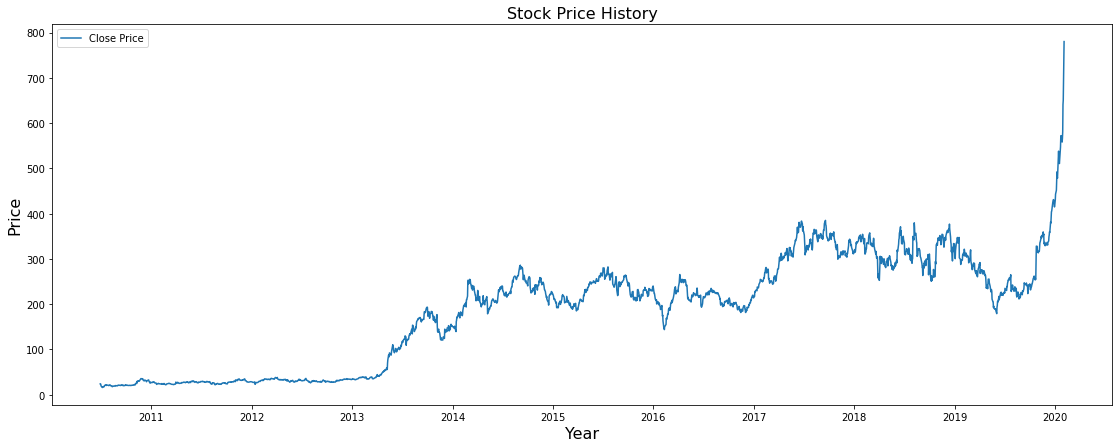

In [ ]:
X = dataset['Date']
Y = dataset['Close']

plt.figure(figsize=(19,7))
plt.plot(X,Y)
plt.title('Stock Price History', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(['Close Price'], loc='upper left')

plt.show()

In [ ]:
# 20 day rolling mean
df = dataset.rolling(20).mean()

In [ ]:
df.head(25)

Open     High      Low    Close  Adj Close     Volume
0       NaN      NaN      NaN      NaN        NaN        NaN
1       NaN      NaN      NaN      NaN        NaN        NaN
2       NaN      NaN      NaN      NaN        NaN        NaN
3       NaN      NaN      NaN      NaN        NaN        NaN
4       NaN      NaN      NaN      NaN        NaN        NaN
5       NaN      NaN      NaN      NaN        NaN        NaN
6       NaN      NaN      NaN      NaN        NaN        NaN
7       NaN      NaN      NaN      NaN        NaN        NaN
8       NaN      NaN      NaN      NaN        NaN        NaN
9       NaN      NaN      NaN      NaN        NaN        NaN
10      NaN      NaN      NaN      NaN        NaN        NaN
11      NaN      NaN      NaN      NaN        NaN        NaN
12      NaN      NaN      NaN      NaN        NaN        NaN
13      NaN      NaN      NaN      NaN        NaN        NaN
14      NaN      NaN      NaN      NaN        NaN        NaN
15      NaN      NaN      NaN      NaN        NaN        NaN
16      NaN      NaN      NaN      NaN        NaN        NaN
17      NaN      NaN      NaN      NaN        NaN        NaN
18      NaN      NaN      NaN      NaN        NaN        NaN
19  20.2405  21.3320  18.7960  19.8715    19.8715  4950955.0
20  20.3180  21.1270  18.9445  19.7130    19.7130  4036000.0
21  20.0670  20.6500  18.7795  19.5390    19.5390  3207445.0
22  19.8270  20.3760  18.7435  19.4380    19.4380  2817850.0
23  19.7020  20.2695  18.8245  19.5240    19.5240  2596765.0
24  19.7520  20.3670  19.0740  19.8160    19.8160  2314945.0

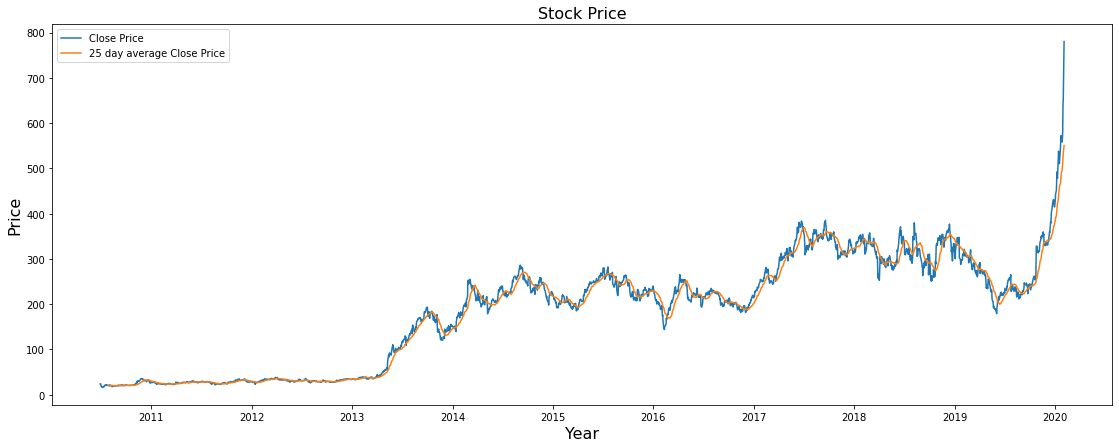

In [ ]:
# plotting close price vs average close price

x1 = dataset['Date']
y1 = dataset['Close']
y2 = df['Close']

plt.figure(figsize=(19,7))
plt.plot(x1,y1)
plt.plot(x1,y2)

plt.title('Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.legend(['Close Price', '25 day average Close Price'], loc='upper left')

plt.show()

### **Splitting data into training dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)

In [ ]:
training_set.head()

Open
0  19.000000
1  25.790001
2  25.000000
3  23.000000
4  20.000000

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [ ]:
training_set.isna().any()

Open    False
dtype: bool

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)
training_set.shape

(2416, 1)

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(30, 2416):
  x_train.append(training_set[i-30:i,0])
  y_train.append(training_set[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2386, 30, 1)

### **Building LSTM model**

In [91]:
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.05))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.05))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.05))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.05))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(0.05))

model.add(Dense(units=1))

In [92]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

In [93]:
# fitting the model to training set
graph = model.fit(x_train, y_train, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
75/75 [==============================] - 13s 73ms/step - loss: 0.0186 - accuracy: 1.8752e-04
Epoch 2/50
75/75 [==============================] - 6s 73ms/step - loss: 0.0018 - accuracy: 1.7090e-04
Epoch 3/50
75/75 [==============================] - 6s 74ms/step - loss: 0.0019 - accuracy: 3.5212e-04
Epoch 4/50
75/75 [==============================] - 5s 72ms/step - loss: 0.0017 - accuracy: 9.5476e-04
Epoch 5/50
75/75 [==============================] - 5s 72ms/step - loss: 0.0015 - accuracy: 0.0014
Epoch 6/50
75/75 [==============================] - 5s 73ms/step - loss: 0.0011 - accuracy: 1.7913e-04
Epoch 7/50
75/75 [==============================] - 5s 73ms/step - loss: 0.0012 - accuracy: 0.0013
Epoch 8/50
75/75 [==============================] - 6s 75ms/step - loss: 0.0011 - accuracy: 6.3968e-05
Epoch 9/50
75/75 [==============================] - 6s 74ms/step - loss: 0.0011 - accuracy: 0.0013
Epoch 10/50
75/75 [==============================] - 5s 72ms/step - loss: 0.0011 - a

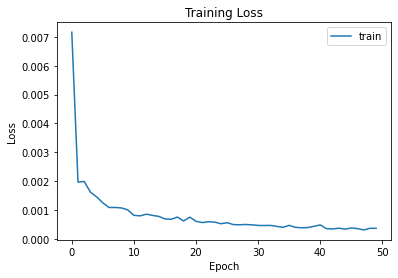

In [94]:
# plotting the loss of the training dataset
plt.plot(graph.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper right')
plt.show()

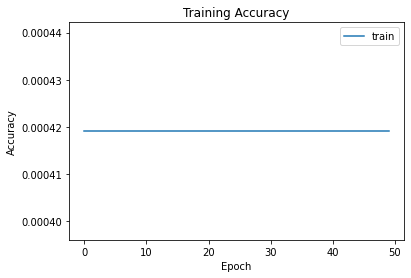

In [95]:
# plotting the accuracy of the training dataset
plt.plot(graph.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper right')
plt.show()

### **Predicting the stock prices**

In [96]:
# creating testing dataset
testing_set = dataset
testing_set = testing_set['Open']
testing_set = pd.DataFrame(testing_set)

In [97]:
_stock_price = dataset['Close']
_stock_price = _stock_price.tail(2410)

In [98]:
testing_set.head()

Open
0  19.000000
1  25.790001
2  25.000000
3  23.000000
4  20.000000

In [99]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [100]:
# predicting the stock prices
ds = pd.concat((dataset['Open'], testing_set['Open']), axis = 0)
input = ds[len(ds) - len(testing_set) - 30:].values
input = input.reshape(-1,1)
input = sc.transform(input)

In [101]:
X_test = []
for i in range(30, 2416):
    X_test.append(input[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

In [102]:
predicted_price = pd.DataFrame(predicted_price)

In [103]:
predicted_price.head()

0
0  674.299988
1  309.698334
2  205.322540
3  128.098145
4   77.621948

In [104]:
predicted_price.columns = ['Predicted']
predicted_price.head()

Predicted
0  674.299988
1  309.698334
2  205.322540
3  128.098145
4   77.621948

In [105]:
predicted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Predicted  2386 non-null   float32
dtypes: float32(1)
memory usage: 9.4 KB


In [106]:
predicted_price = predicted_price.tail(2380)

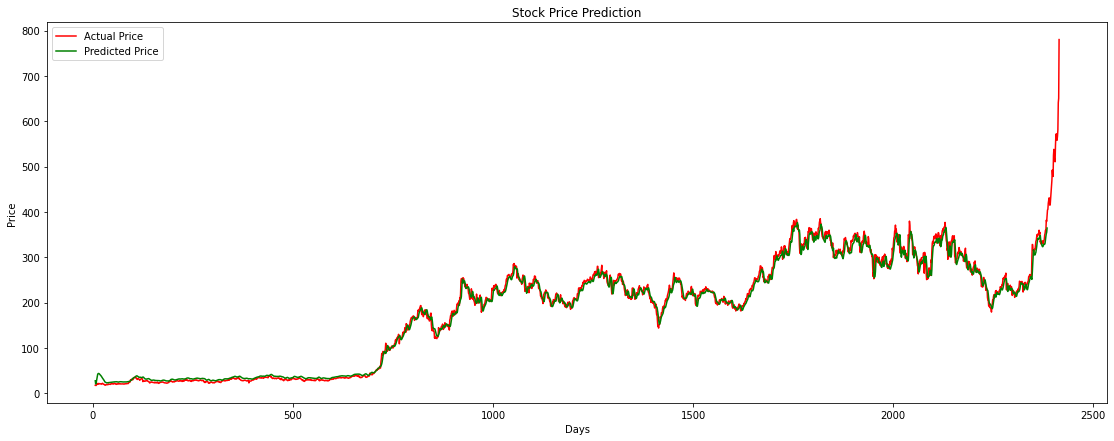

In [107]:
# plotting the actual prices vs predicted prices
plt.figure(figsize=(19,7))
plt.plot(_stock_price, color='red', label='Actual Price')
plt.plot(predicted_price, color='green', label='Predicted Price')

plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(loc='upper left')

plt.show()